<a href="https://colab.research.google.com/github/bhuvaneswarignanasekar/ML-projects/blob/main/energy_consumption/energy_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Currently Working 

In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv("/content/train_data.csv")

In [ ]:
import seaborn as sns

In [ ]:
train.head()

,date,energy,enthalpy
0,2019-06-02,6661.954286,30488.616385
1,2019-06-03,6663.454286,30338.174100
2,2019-06-04,6653.537143,30670.887292
3,2019-06-05,6643.868571,30807.607844
4,2019-06-06,6616.860000,30775.883551


In [ ]:
train.isna().any()

date        False
energy      False
enthalpy    False
dtype: bool

In [ ]:
train['month'] = pd.DatetimeIndex(train['date']).month

In [ ]:
train.head()

,date,energy,enthalpy,month
0,2019-06-02,6661.954286,30488.616385,6
1,2019-06-03,6663.454286,30338.174100,6
2,2019-06-04,6653.537143,30670.887292,6
3,2019-06-05,6643.868571,30807.607844,6
4,2019-06-06,6616.860000,30775.883551,6


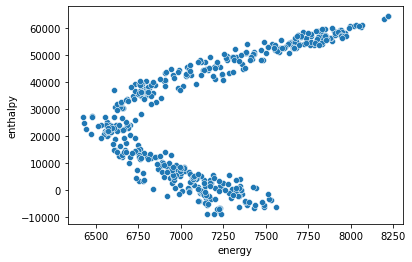

In [ ]:
sns.scatterplot(x="energy",y="enthalpy",data=train)

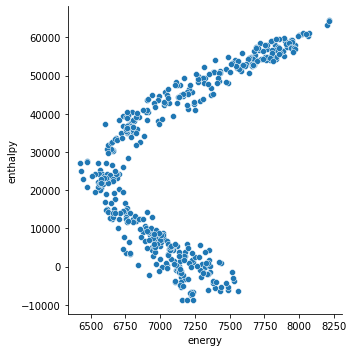

In [ ]:
sns.relplot(x="energy",y="enthalpy",data=train)

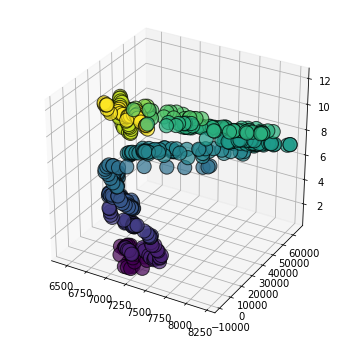

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train['energy'],train['enthalpy'],train['month'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=train['month'])
plt.show()


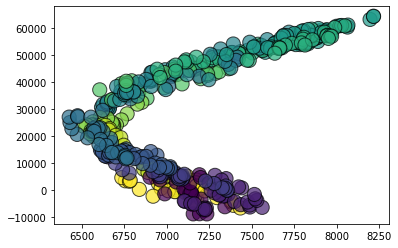

In [ ]:
plt.scatter(train['energy'],train['enthalpy'],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=train['month'])
plt.show()

In [ ]:
df=pd.read_csv('/content/data.csv')
df['month'] = pd.DatetimeIndex(df['date']).month

In [ ]:
df.head()

,date,energy,enthalpy,month
0,2019-02-22,6938.614286,-5851.336089,2
1,2019-02-23,7148.391429,-6441.032345,2
2,2019-02-24,7110.120000,-4349.099258,2
3,2019-02-25,7072.765714,-2372.592647,2
4,2019-02-26,7222.465714,-2360.898917,2


In [ ]:
df.drop(["date"],axis=1,inplace=True)

In [ ]:
#df.drop(['clusters'],axis=1,inplace=True)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 67)
df['clusters'] = kmeans.fit_predict(df)

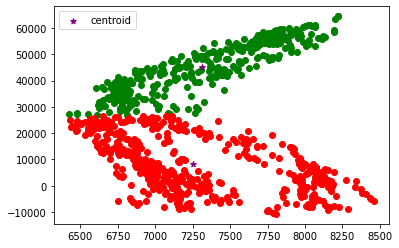

In [ ]:
kmeans.cluster_centers_
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
plt.scatter(df1.energy,df1['enthalpy'],color='green')
plt.scatter(df2.energy,df2['enthalpy'],color='red')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
com=df.copy()
com.drop(['clusters'],axis=1,inplace=True)

In [ ]:
condition=[(com['energy'] == train['energy']),(com['enthalpy']==train['enthalpy']),(com['month']==train['enthalpy'])]
choice=[True,False]
df['train_data'] =np.select(conditions, choices, default=np.nan) 

ValueError: ignored

In [ ]:
dfff=df.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(dfff[['enthalpy']])
dfff['enthalpy']=scalar.transform(dfff[['enthalpy']])

In [ ]:
dfff.head()

,energy,enthalpy,month
0,0.252139,0.064472,2
1,0.355453,0.056629,2
2,0.336605,0.084454,2
3,0.318208,0.110744,2
4,0.391935,0.110899,2


In [ ]:

scalar=MinMaxScaler()
scalar.fit(dfff[['energy']])
dfff['energy']=scalar.transform(dfff[['energy']])

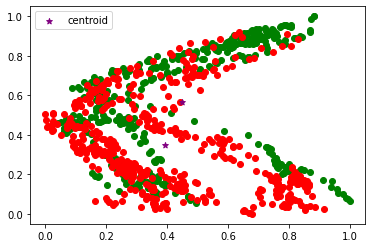

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 67)
dfff['clusters'] = kmeans.fit_predict(dfff)
kmeans.cluster_centers_
df1 = dfff[dfff.clusters==0]
df2 = dfff[dfff.clusters==1]
plt.scatter(df1.energy,df1['enthalpy'],color='green')
plt.scatter(df2.energy,df2['enthalpy'],color='red')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

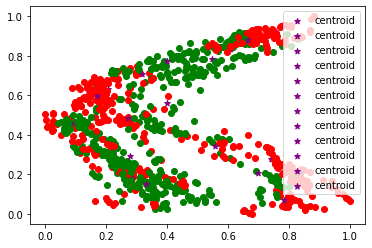

In [ ]:
for i in range(12):
  j=i+1
  check=pd.DataFrame()
  check=dfff[dfff.month==j]
  kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 67)
  check['clusters'] = kmeans.fit_predict(check)
  kmeans.cluster_centers_
  df1 = check[check.clusters==0]
  df2 = check[check.clusters==1]
  plt.scatter(df1.energy,df1['enthalpy'],color='green')
  plt.scatter(df2.energy,df2['enthalpy'],color='red')
  plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
  plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


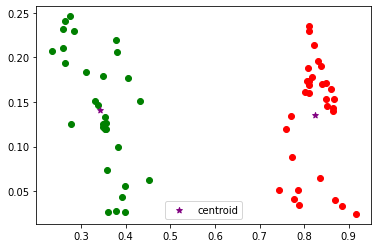

In [ ]:
check=pd.DataFrame()
check=dfff[df.month==1]
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 67)
check['clusters'] = kmeans.fit_predict(check)
kmeans.cluster_centers_
df1 = check[check.clusters==0]
df2 = check[check.clusters==1]
plt.scatter(df1.energy,df1['enthalpy'],color='green')
plt.scatter(df2.energy,df2['enthalpy'],color='red')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
train['month'] = pd.DatetimeIndex(train['date']).month
train.drop(['date'],axis=1,inplace=True)

In [ ]:
train.head()

,energy,enthalpy,month
0,6661.954286,30488.616385,6
1,6663.454286,30338.174100,6
2,6653.537143,30670.887292,6
3,6643.868571,30807.607844,6
4,6616.860000,30775.883551,6


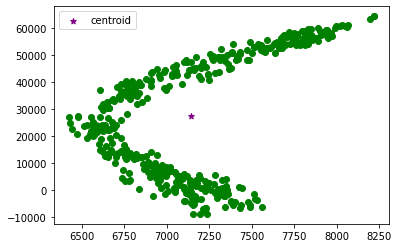

In [ ]:
km = KMeans(n_clusters = 1, init = 'k-means++', random_state = 67)
train['clusters'] = km.fit_predict(train)
km.cluster_centers_
df1 = train[train.clusters==0]
df2 = train[train.clusters==1]
plt.scatter(df1.energy,df1['enthalpy'],color='green')
plt.scatter(df2.energy,df2['enthalpy'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

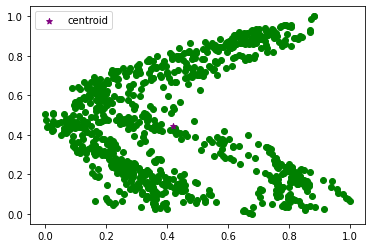

In [ ]:
dfff['clusters'] = km.fit_predict(dfff)
km.cluster_centers_
df1 = dfff[dfff.clusters==0]
df2 = dfff[dfff.clusters==1]
plt.scatter(df1.energy,df1['enthalpy'],color='green')
plt.scatter(df2.energy,df2['enthalpy'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()